<img src="https://m1.quebecormedia.com/emp/emp/bender8175858f-7dbd-4927-85c5-85557e800b98_ORIGINAL.jpg?impolicy=crop-resize&x=0&y=0&w=1000&h=745&width=925&height=925" style="float: left; margin: 30px; height: 75px">

# Predicting Customer Satisfaction on Rent the Runway

## II. EDA
### Katrin Ayrapetov


<font style="font-size: 2rem; color: blue">


 
</font>

In [1]:
#Import the necessary libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('../Data/df_clean.csv')

In [3]:
df.head()

,Label,Size,Overall_fit,Rented_for,Size_usually_worn,Height,Age,Bust_size,Body_type,Weight,Rating,Date,Brand,Dress_Description,Retail_price,Rent_price,Product_details,Number_of_reviews,Details,Sleeves,Neckline,Dress_Style,BMI
0,TOP CONTRIBUTOR,S,Overall fit: True to Size,Vacation,8,66,31,34C,athletic,142,5,spring,Tory Burch,Painted Roses Smocked Dress,478,70,"hourglass. sleeveless. square neckline. 45"" fr...",33,['hourglass'],sleeveless,square_neckline,hourglass,22.916896
1,TOP CONTRIBUTOR,M,Overall fit: Large,Wedding,6,67,33,36C,hourglass,150,5,spring,Tory Burch,Painted Roses Smocked Dress,478,70,"hourglass. sleeveless. square neckline. 45"" fr...",33,['hourglass'],sleeveless,square_neckline,hourglass,23.490755
2,TOP CONTRIBUTOR,S,Overall fit: Large,Everyday,6,66,27,34B,pear,140,5,spring,Tory Burch,Painted Roses Smocked Dress,478,70,"hourglass. sleeveless. square neckline. 45"" fr...",33,['hourglass'],sleeveless,square_neckline,hourglass,22.594123
3,TOP CONTRIBUTOR,L,Overall fit: True to Size,unknown,12,66,42,36B,pear,181,5,spring,Tory Burch,Painted Roses Smocked Dress,478,70,"hourglass. sleeveless. square neckline. 45"" fr...",33,['hourglass'],sleeveless,square_neckline,hourglass,29.210973
4,TOP CONTRIBUTOR,L,Overall fit: True to Size,Everyday,12,70,48,34D,pear,165,5,spring,Tory Burch,Painted Roses Smocked Dress,478,70,"hourglass. sleeveless. square neckline. 45"" fr...",33,['hourglass'],sleeveless,square_neckline,hourglass,23.672449


In [4]:
def create_percentile_table(column):
    data =  {'Percentile': ["min",'10th', '20th', '30th', '40th',"50th","60th","70th","80th","90th","max"], 
          column: [df[column].min(),df[column].quantile(0.1), df[column].quantile(0.2), df[column].quantile(0.3), df[column].quantile(0.4),df[column].quantile(0.5),df[column].quantile(0.6),df[column].quantile(0.7),df[column].quantile(0.8),df[column].quantile(0.9),df[column].max()]} 
    percentile_table = pd.DataFrame(data)
    percentile_table.set_index('Percentile')
    return percentile_table

In [5]:
# How many brands are there total on the website? There are 519 different Brands. 
len(list(df.Brand.unique()))


519

In [6]:
# How many unique garments are there? There are 6,685 unique dresses. 
len(list(df.Dress_Description.unique()))

6685

In [7]:
#What are the summary statistics for the numeric features. 
df.describe()

,Height,Age,Weight,Rating,Retail_price,Rent_price,Number_of_reviews,BMI
count,161329.000000,161329.000000,161329.000000,161329.000000,161329.000000,161329.000000,161329.000000,161329.000000
mean,65.276125,37.702112,143.381326,4.336263,424.690688,60.451239,90.175939,23.657577
std,2.681237,9.173667,25.215745,1.006066,274.556935,39.014852,138.919031,3.943556
min,53.000000,0.000000,80.000000,1.000000,43.000000,30.000000,0.000000,12.528403
25%,63.000000,31.000000,125.000000,4.000000,246.000000,30.000000,36.000000,20.980257
50%,65.000000,36.000000,140.000000,5.000000,375.000000,50.000000,57.000000,22.826904
75%,67.000000,43.000000,155.000000,5.000000,500.000000,73.000000,97.000000,25.526621
max,78.000000,80.000000,298.000000,5.000000,3595.000000,525.000000,3489.000000,58.421053


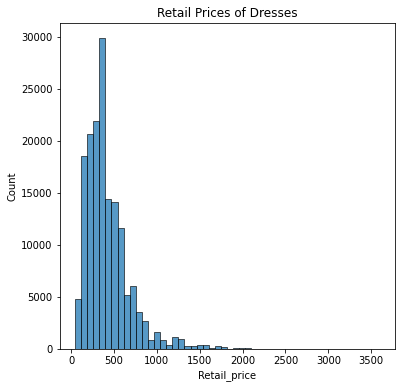

In [8]:
#What is the distribution of the retail price of the garments? 

plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Retail_price",bins=50).set(title='Retail Prices of Dresses');

In [9]:
#The average retail price of the garment is $424. 
df.Retail_price.mean()

424.69068797302407

In [10]:
#The median retail price of the garment is $375 and 90% of the garment cost $713.00 or less. 
percentile_table_retail_prices = create_percentile_table('Retail_price')
percentile_table_retail_prices

,Percentile,Retail_price
0,min,43.0
1,10th,159.0
2,20th,216.0
3,30th,275.0
4,40th,325.0
5,50th,375.0
6,60th,410.0
7,70th,495.0
8,80th,588.0
9,90th,713.0


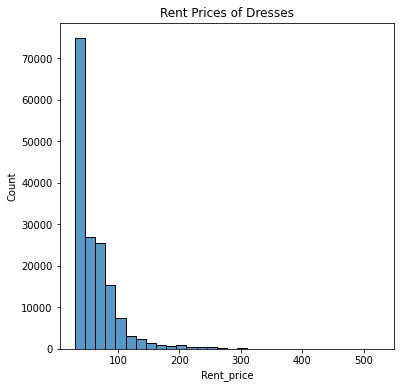

In [11]:
#what is the distribution of the rented price of the garments?
plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Rent_price",bins=30).set(title='Rent Prices of Dresses');

In [12]:
#The average rent price of the garment is $60. 
df.Rent_price.mean()

60.45123939279361

In [13]:
#The median rent price of the garment is $50 and 90% of the garment costing $100.00 or less to rent. 
percentile_table_rent_prices = create_percentile_table('Rent_price')
percentile_table_rent_prices 

,Percentile,Rent_price
0,min,30.0
1,10th,30.0
2,20th,30.0
3,30th,35.0
4,40th,41.0
5,50th,50.0
6,60th,60.0
7,70th,70.0
8,80th,80.0
9,90th,100.0


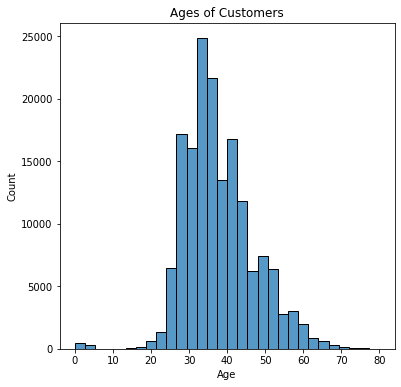

In [14]:
#What is Age distribution of the customers? 
plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Age",bins=30).set(title='Ages of Customers');

In [15]:
#The average age of the customer is 37 years old. 
df.Age.mean() 

37.70211183358231

In [16]:
#The median age of the customer is 36 years old and 90% of the customers are 51 years old or younger. 
percentile_table_Age = create_percentile_table('Age')
percentile_table_Age

,Percentile,Age
0,min,0.0
1,10th,28.0
2,20th,30.0
3,30th,32.0
4,40th,34.0
5,50th,36.0
6,60th,39.0
7,70th,41.0
8,80th,45.0
9,90th,51.0


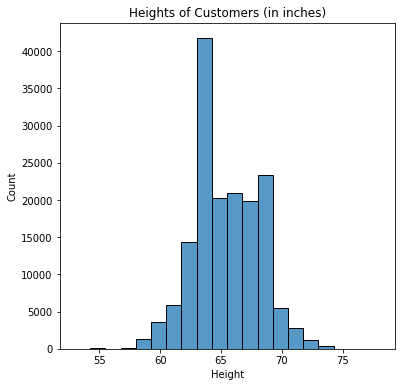

In [17]:
#What is Height distribution of the customers? 
plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Height",bins=20).set(title='Heights of Customers (in inches)');

In [18]:
#The median height of the customer is 5 feet and 4 inches.  
percentile_table_Height = create_percentile_table('Height')
percentile_table_Height

,Percentile,Height
0,min,53.0
1,10th,62.0
2,20th,63.0
3,30th,64.0
4,40th,64.0
5,50th,65.0
6,60th,66.0
7,70th,67.0
8,80th,68.0
9,90th,69.0


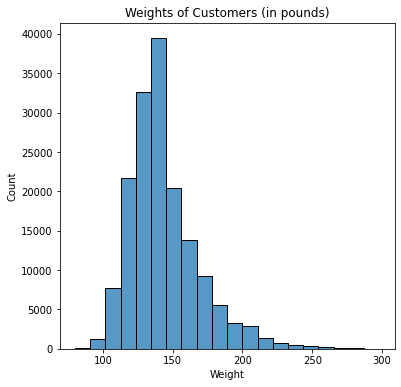

In [19]:
#What is Weight distribution of the customers? 

plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Weight",bins=20).set(title='Weights of Customers (in pounds)');

In [20]:
#The average weight of the customer is 143 pounds. The median weight of the customer is 140.00 pounds. 
print(df.Weight.mean())
df.Weight.quantile(0.5)

143.38132635793937


140.0

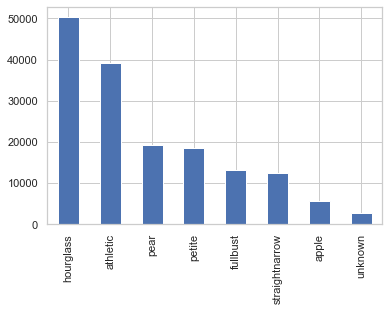

In [21]:
#What is the Body Type distribution of the customers? 
sns.set(style="whitegrid")
df.Body_type.value_counts().plot(kind="bar");

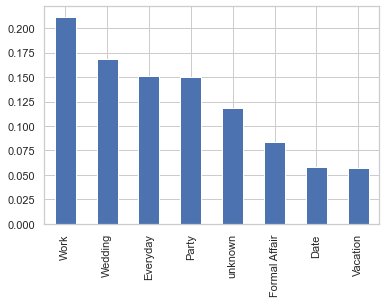

In [22]:
# What is the distribution of the events rented for ? 
#It looks like about 25% of the customers rent the clothes for work. 
df.Rented_for.value_counts(normalize=True).plot(kind="bar");

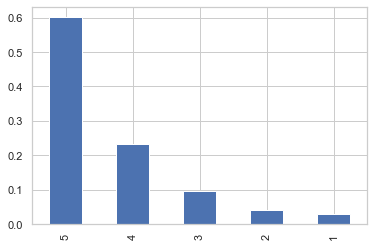

In [23]:
# What is the distribution for ratings for garments look like? 
#It looks like: 
# 5 - 60% , 4 - 23%, 3 - 10%, 2 - 4% , 1 - 3% 
df.Rating.value_counts(normalize=True).plot(kind="bar");

In [ ]:
,normalize='index'.round(3)

In [36]:
#What is the relationship between the Reason for Renting and the Customer Satisfaction? 
pd.crosstab(index=df['Rented_for'], columns=df['Rating'],margins=True)

Rating,1,2,3,4,5,All
Rented_for,,,,,,
Date,273,353,944,2150,5655,9375
Everyday,1069,1485,3369,6134,12382,24439
Formal Affair,187,234,756,2724,9608,13509
Party,620,841,2010,5355,15457,24283
Vacation,332,390,913,1943,5662,9240
Wedding,293,464,1313,5851,19288,27209
Work,1040,1571,4173,9329,18043,34156
unknown,971,1097,2149,3895,11006,19118
All,4785,6435,15627,37381,97101,161329


C:\Users\Katri\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


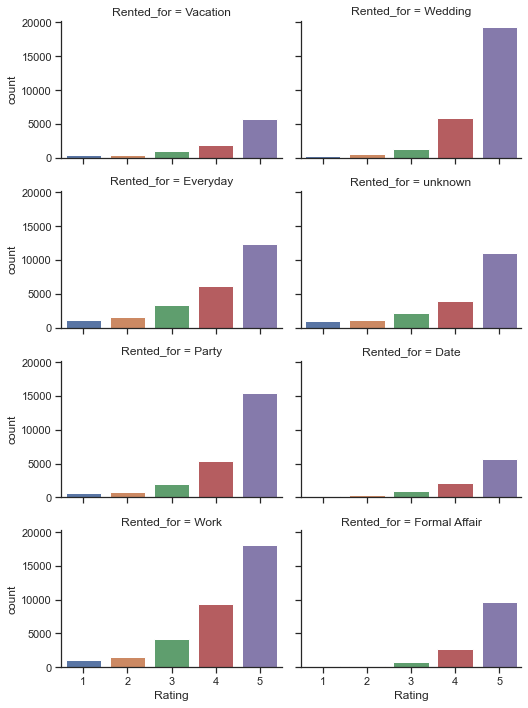

In [56]:
#Rated for and Satisfaction Rating 
with sns.axes_style(style='ticks'):
    g = sns.catplot("Rating", col="Rented_for", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)  
    

In [37]:
#What is the relationship between the Season Rented and the Customer Satisfaction? 
pd.crosstab(index=df['Date'], columns=df['Rating'],margins=True)

Rating,1,2,3,4,5,All
Date,,,,,,
fall,1288,1821,4173,10300,27149,44731
spring,1366,1825,4175,9173,23036,39575
summer,1205,1579,3900,9224,23469,39377
winter,926,1210,3379,8684,23447,37646
All,4785,6435,15627,37381,97101,161329


In [40]:
#What is the relationship between the Overall_Fit and the Customer Satisfaction? 
pd.crosstab(index=df['Overall_fit'], columns=df['Rating'])

Rating,1,2,3,4,5
Overall_fit,,,,,
Overall fit: Large,912,1154,2253,3548,4168
Overall fit: Small,1614,1657,3054,3862,4880
Overall fit: True to Size,812,1458,4172,13395,44664
unknown,1447,2166,6148,16576,43389


In [44]:
df.columns

Index(['Label', 'Size', 'Overall_fit', 'Rented_for', 'Size_usually_worn',
       'Height', 'Age', 'Bust_size', 'Body_type', 'Weight', 'Rating', 'Date',
       'Brand', 'Dress_Description', 'Retail_price', 'Rent_price',
       'Product_details', 'Number_of_reviews', 'Details', 'Sleeves',
       'Neckline', 'Dress_Style', 'BMI'],
      dtype='object')

In [ ]:
#Look at the scatterplot relationships of numeric features. Are there any clear relationships? 
#What is the relationship between Weight and Customer Satisfaction?
plt.figure(figsize=(14,9))
plt.scatter(df.Rating, df.Weight,  s=8);

C:\Users\Katri\AppData\Local\Temp\ipykernel_29608\1870838537.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

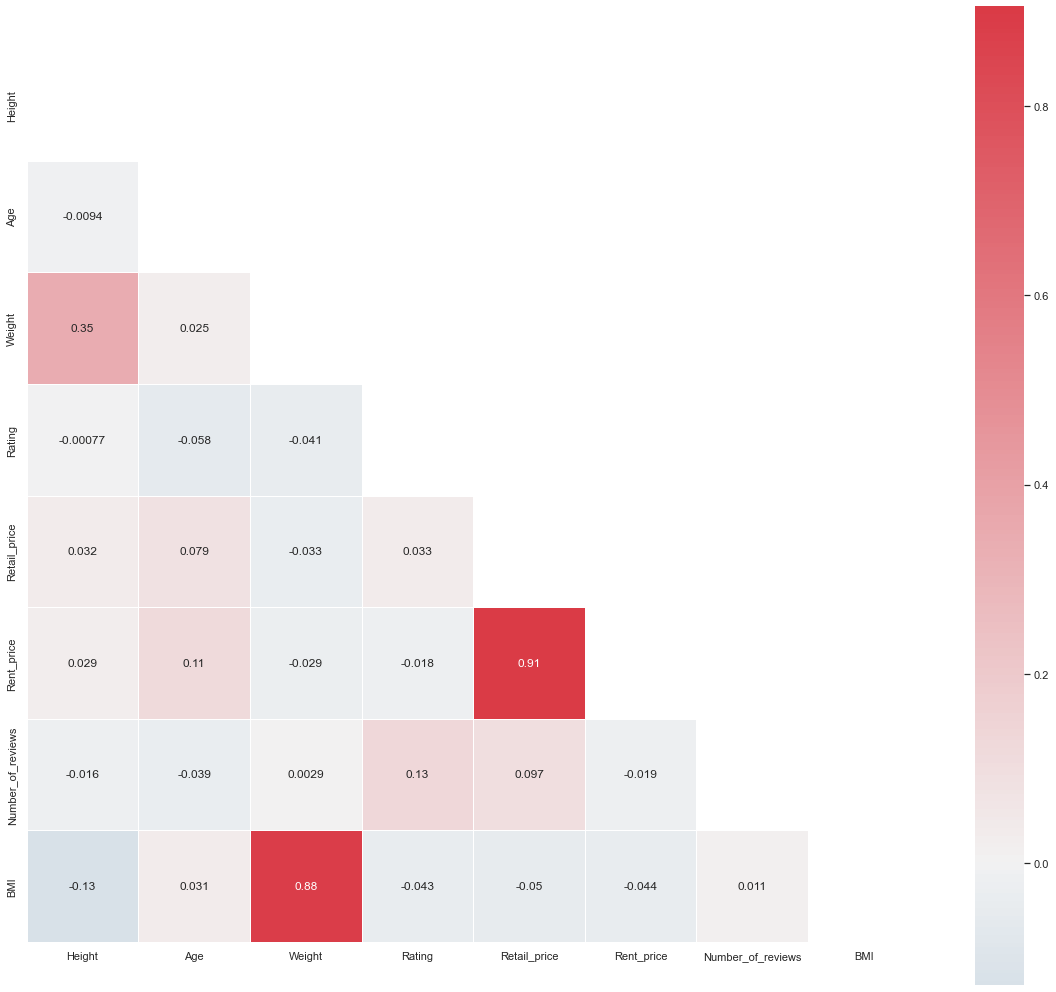

In [57]:
#Let's look at the correlation matrix among the numeric features. 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# We can see that Retail price and rent price are very highly correlated. That is because 
#Rent price is probably a certain percentage of the Retail price.
#Remove the Retail price column for the modeling process. 

#Also BMI and weight are related. Remove the Weight column in the modeling process. 